# Pertemuan 5 (Convolutional Neural Network)

### Mata Kuliah Pembelajaran Mendalam

#Convolusi

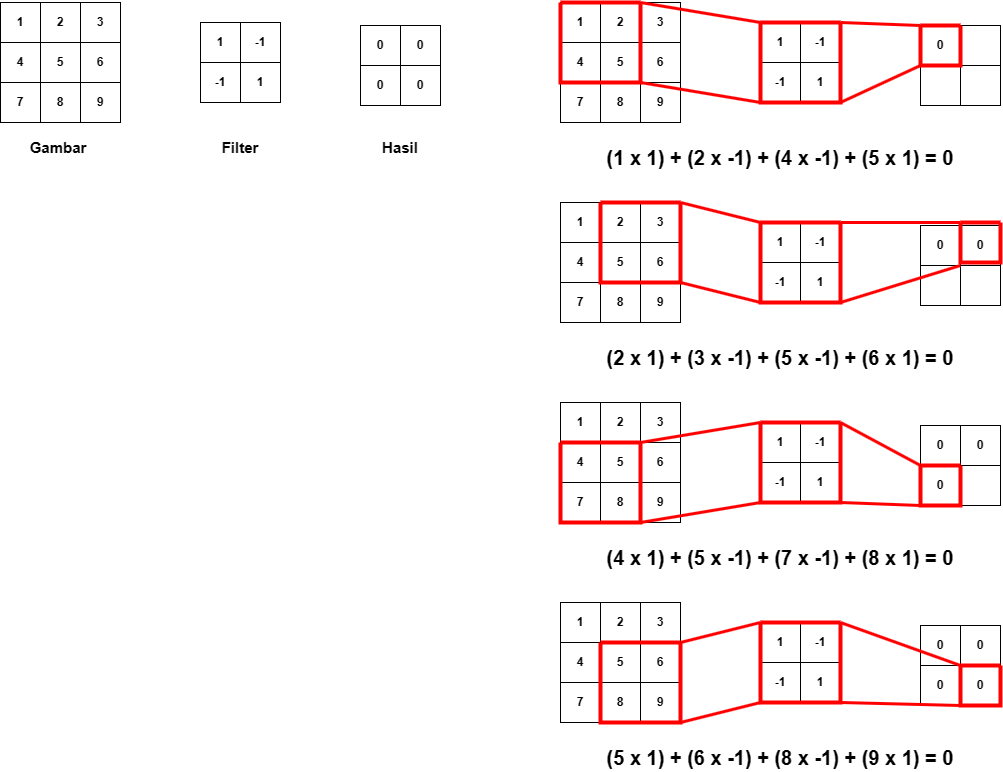

#Stride

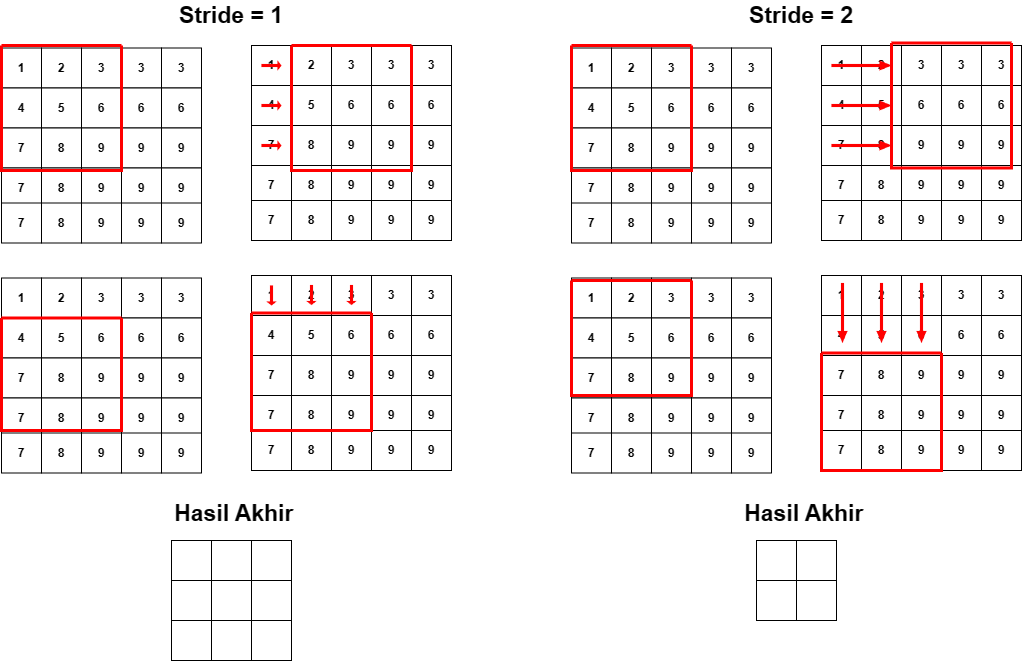

#Padding

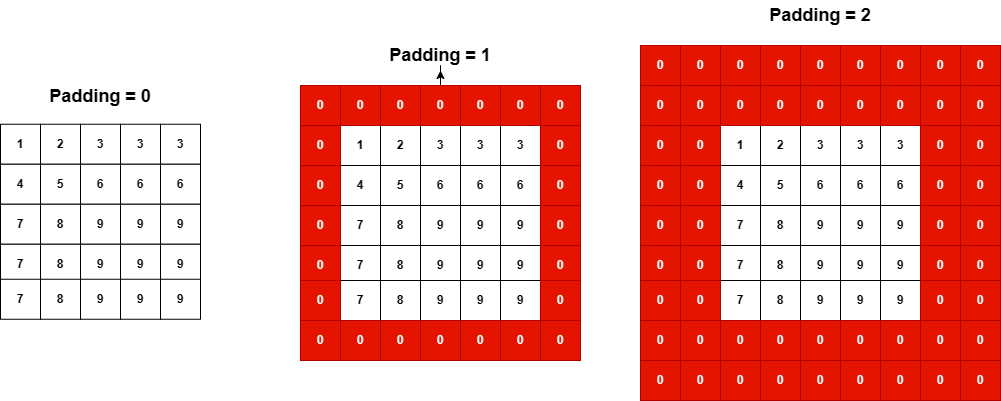

#Pooling

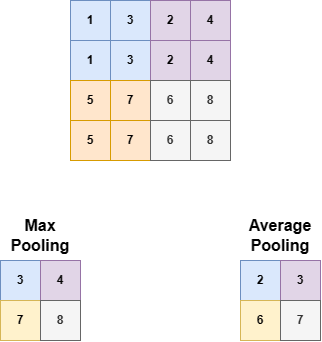

## Latihan Membuat Model

### 1 - Import Library

In [2]:
pip install keras

In [4]:
# Import Library yang digunakan
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras import layers, models
from keras.datasets import mnist

### 2 - Read and Split Dataset

Menggunakan dataset "MNIST" yang tersedia.

MNIST dataset adalah data besar berisi angka-angka tulisan tangan yang biasa digunakan untuk melatih berbagai sistem pemrosesan gambar.

Link dataset kaggle: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

In [5]:
# Load dataset and split data train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


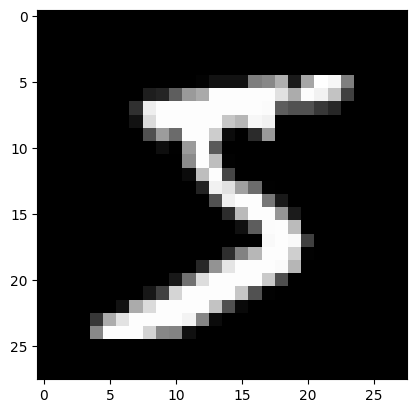

In [6]:
# Read data
plt.imshow(x_train[0], cmap='gray')

### 3 - Preprocessing

In [7]:
# Reshipe and Normalize data
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train = x_train/225
x_test = x_test/225

> x_train dan x_test direshape dengan ukuran 60000 data, ukuran 28x28 dan warna grayscale.

> x_train dan x_test dilakukan normalisasi.

In [8]:
# Check Class Data
set(y_train.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Terlihat bahwa terdapat 10 kelas dataset yaitu angka 0 - 9.

### 4 - Pemodelan Menggunakan CNN

In [11]:
# Create CNN Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
# Summary Data

### 5 - Compile Model

In [14]:
# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 6 - Training Model

In [15]:
# Training Model
hasil = model.fit(x_train, y_train, epochs=10, batch_size=356, validation_split=0.2)

Epoch 1/10
135/135 [==============================] - 34s 240ms/step - loss: 0.4446 - accuracy: 0.8735 - val_loss: 0.1148 - val_accuracy: 0.9663
Epoch 2/10
135/135 [==============================] - 33s 248ms/step - loss: 0.0940 - accuracy: 0.9714 - val_loss: 0.0744 - val_accuracy: 0.9774
Epoch 3/10
135/135 [==============================] - 32s 238ms/step - loss: 0.0634 - accuracy: 0.9809 - val_loss: 0.0619 - val_accuracy: 0.9823
Epoch 4/10
135/135 [==============================] - 34s 249ms/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0546 - val_accuracy: 0.9840
Epoch 5/10
135/135 [==============================] - 32s 240ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0485 - val_accuracy: 0.9858
Epoch 6/10
135/135 [==============================] - 33s 244ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.0458 - val_accuracy: 0.9862
Epoch 7/10
135/135 [==============================] - 35s 259ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0446 - val_ac

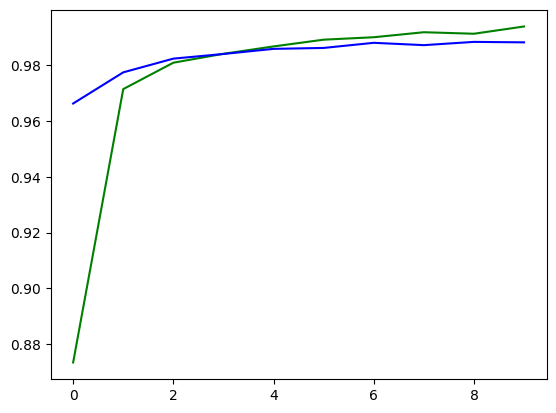

In [19]:
# Evaluate using Matplotlib
y1 = hasil.history['accuracy']
y2 = hasil.history['val_accuracy']
plt.plot(range(len(y1)), y1, 'g',
         range(len(y2)), y2, 'b')

plt.show()

### 7 - Evaluasi Model

In [20]:
# Test Accuracy model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy = ", test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.0366 - accuracy: 0.9890
Test Accuracy =  0.9890000224113464


### 8 - Prediksi

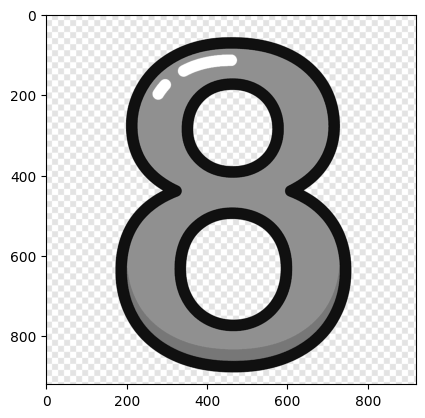

In [23]:
# Upload test image
img = cv2.imread('/content/angka8.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [22]:
img.shape

(1200, 1200)

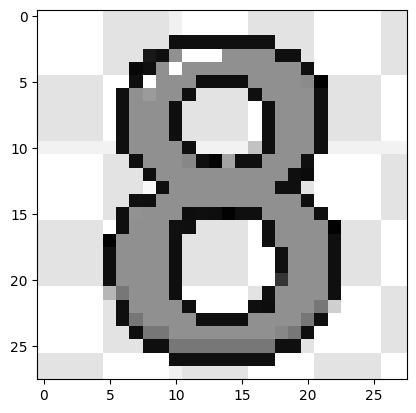

In [24]:
img = cv2.resize(img, (28, 28))
plt.imshow(img, cmap='gray')

In [25]:
img = img/255
img = img.reshape((1, 28, 28, 1))
img.shape

(1, 28, 28, 1)

In [27]:
pred = model.predict(img)
pred = np.argmax(pred)
print('Prediksi Gambar, Angka = ', pred)

1/1 [==============================] - 0s 20ms/step
Prediksi Gambar, Angka =  8
